In [1]:
import scib
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import latentvelo as ltv

Global seed set to 0


In [2]:
model_adata = sc.read('batch_correction/fits/batch_correction_2knockout_latent_adata.h5ad')
model_adata.obsm['X_latent'] = model_adata.X.copy()

model_annot_adata = sc.read('batch_correction/fits/batch_correction_annot_2knockout_latent_adata.h5ad')
model_annot_adata.obsm['X_latent'] = model_annot_adata.X.copy()

scvi_adata = sc.read('batch_correction/fits/batch_correction_scvi_2knockout_adata.h5ad')

combat_adata = sc.read('batch_correction/fits/batch_correction_combat_unitvelo_2bifucation_adata.h5ad')
scgen_adata = sc.read('batch_correction/fits/batch_correction_scgen_unitvelo_2bifucation_adata.h5ad')

saving figure to file ../figures/zr_2knockout_latenttime.pdf


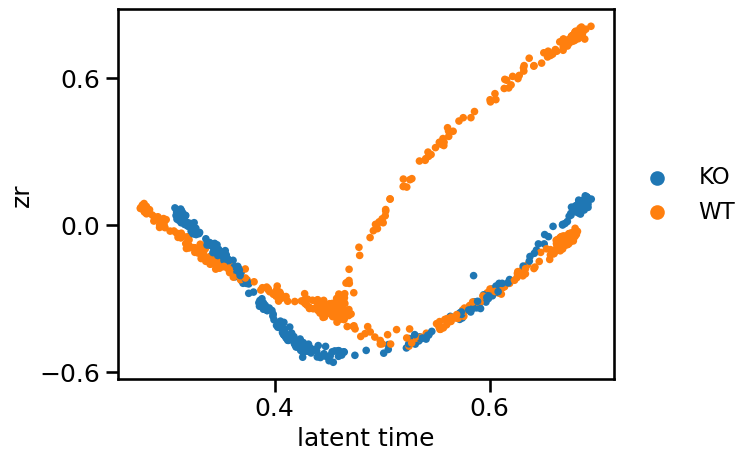

In [3]:
import seaborn as sns
model_annot_adata.obs['zr'] = model_annot_adata.obsm['zr'][:,0]

scv.pl.scatter(model_annot_adata, y = "zr", x="latent_time", color='model', legend_loc='right',
              title='', save='../figures/zr_2knockout_latenttime.pdf')

computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
saving figure to file figures/scANVI_batch_correction_2knockout.png


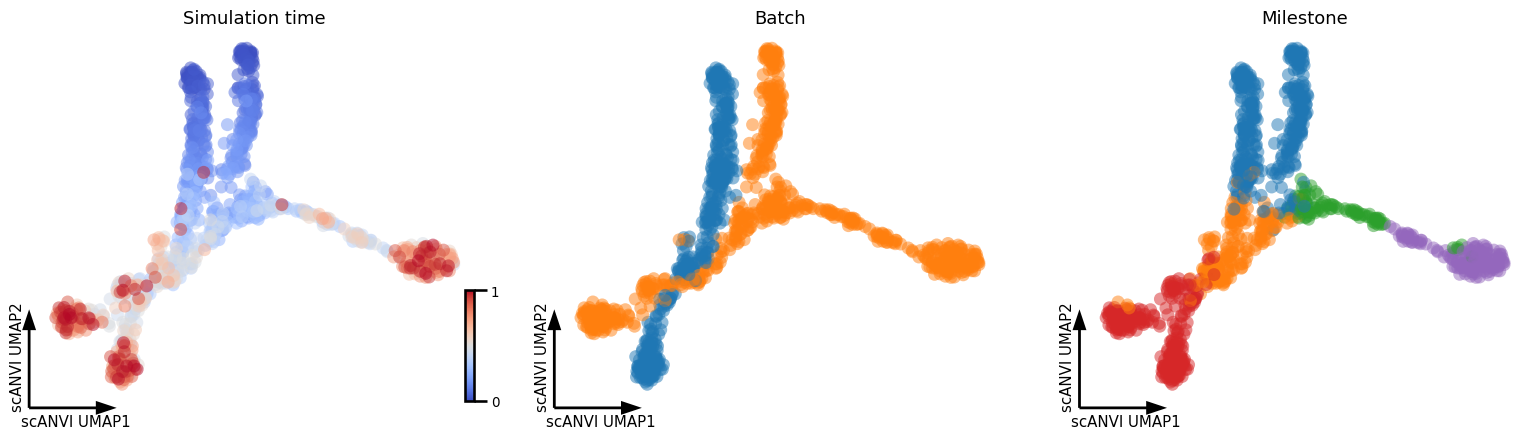

In [4]:
scv.pp.neighbors(scvi_adata, use_rep='X_scANVI',n_neighbors=30)
scv.tl.umap(scvi_adata)
scv.pl.umap(scvi_adata, color=['sim_time', 'batch', 'milestone'], title=['Simulation time', 'Batch', 'Milestone'], frameon='artist', xlabel='scANVI UMAP1', ylabel='scANVI UMAP2',
           size=350, alpha=0.5, color_map='coolwarm', rescale_color=(0,1),fontsize=13,
           save='figures/scANVI_batch_correction_2knockout.png')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
saving figure to file figures/scVI_batch_correction_2knockout.png


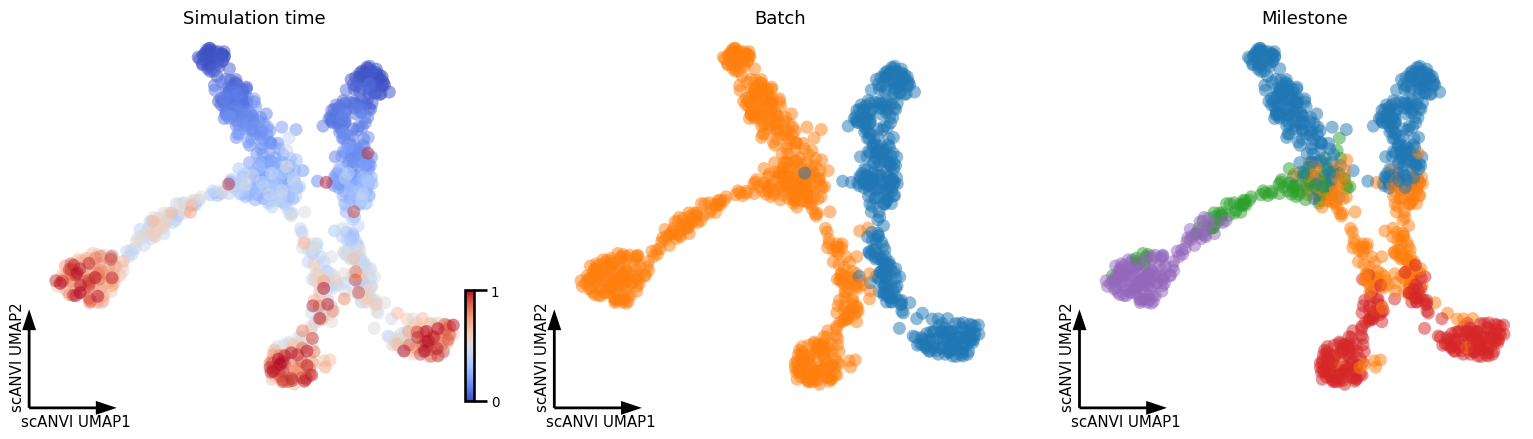

In [5]:
scv.pp.neighbors(scvi_adata, use_rep='X_scVI',n_neighbors=30)
scv.tl.umap(scvi_adata)
scv.pl.umap(scvi_adata, color=['sim_time', 'batch', 'milestone'], title=['Simulation time', 'Batch', 'Milestone'], frameon='artist', xlabel='scANVI UMAP1', ylabel='scANVI UMAP2',
           size=350, alpha=0.5, color_map='coolwarm', rescale_color=(0,1),fontsize=13,
           save='figures/scVI_batch_correction_2knockout.png')

saving figure to file ./figures/scvelo_model_2knockout_data_umap.png


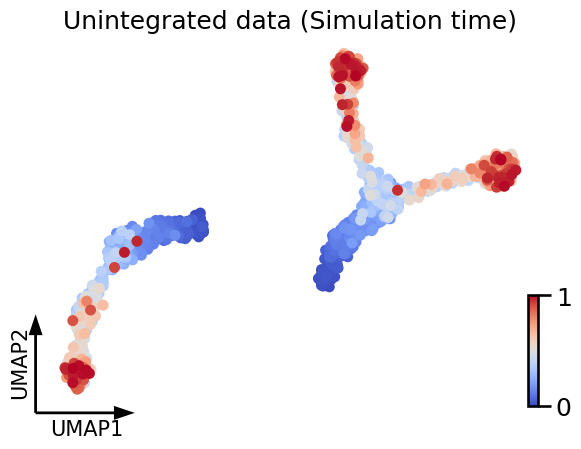

In [6]:
scv.pl.umap(model_adata, color='sim_time', rescale_color=(0,1), color_map='coolwarm',
           size=250, frameon='artist', title='Unintegrated data (Simulation time)', save='model_2knockout_data_umap.png')

saving figure to file ./figures/scvelo_model_2knockout_data_umap_milestone.png


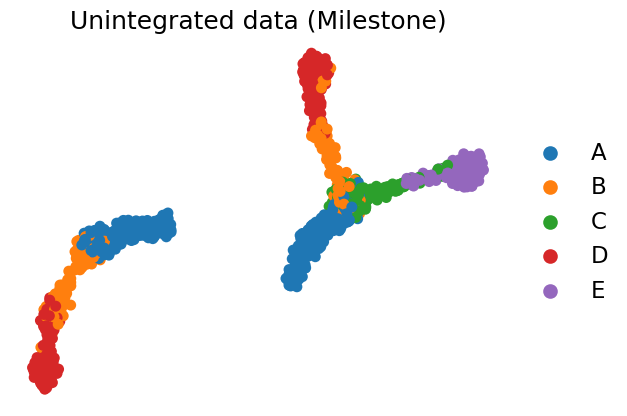

In [7]:
scv.pl.umap(model_adata, color='milestone', rescale_color=(0,1), color_map='coolwarm',
            legend_loc='right',
           size=250,  title='Unintegrated data (Milestone)', save='model_2knockout_data_umap_milestone.png')

In [8]:
model_adata.obs['batch'] = model_adata.obs['model']
model_scib = ltv.ev.integration_metrics(model_adata, label_key='milestone', 
                                         batch_key = 'batch', emb_key='X_latent')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
C consists of a single batch or is too small. Skip.
E consists of a single batch or is too small. Skip.


In [9]:
model_annot_adata.obs['batch'] = model_annot_adata.obs['model']
model_annot_scib = ltv.ev.integration_metrics(model_annot_adata, label_key='milestone', 
                                         batch_key = 'batch', emb_key='X_latent')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
C consists of a single batch or is too small. Skip.
E consists of a single batch or is too small. Skip.
Adding diffusion to step 4


In [10]:
scvi_scib = ltv.ev.integration_metrics(scvi_adata, label_key='milestone', 
                                         batch_key = 'batch', emb_key='X_scVI')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
C consists of a single batch or is too small. Skip.
E consists of a single batch or is too small. Skip.


In [11]:
scanvi_scib = ltv.ev.integration_metrics(scvi_adata, label_key='milestone', 
                                         batch_key = 'batch', emb_key='X_scANVI')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
C consists of a single batch or is too small. Skip.
E consists of a single batch or is too small. Skip.


In [12]:
combat_scib = ltv.ev.integration_metrics(combat_adata, label_key='milestone', 
                                         batch_key = 'batch', emb_key='X_pca')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
Adding diffusion to step 4


In [13]:
scgen_scib = ltv.ev.integration_metrics(scgen_adata, label_key='milestone', 
                                         batch_key = 'batch', emb_key='X_pca')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
Adding diffusion to step 4


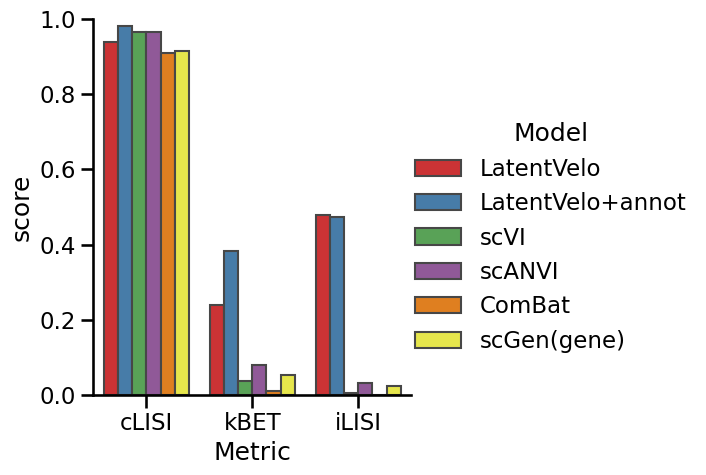

In [14]:
ltv.pl.integration_metrics([model_scib, model_annot_scib, scvi_scib, scanvi_scib, combat_scib, scgen_scib],
                           ['LatentVelo', 'LatentVelo+annot', 'scVI', 'scANVI', 'ComBat', 'scGen(gene)'],
                           edgecolor='#474747ff',height=5, aspect=1)
#plt.savefig('figures/integration_metrics_2knockout.pdf')
plt.show()

In [15]:
sc.pp.pca(model_adata)
scv.pp.neighbors(model_adata, use_rep='X', n_neighbors=30)
scv.tl.velocity_graph(model_adata, vkey='spliced_velocity')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [16]:
sc.pp.pca(model_annot_adata)
scv.pp.neighbors(model_annot_adata, use_rep='X', n_neighbors=30)
scv.tl.velocity_graph(model_annot_adata, vkey='spliced_velocity')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [17]:
cluster_edges = [('A', 'B'), ('A', 'C'),
                 ('C', 'E'), ('B', 'D')]
adata = sc.read('batch_correction/fits/batch_correction_2knockout_adata.h5ad')
adata.obs['batch'] = adata.obs['model']
adata.layers['rna_velocity'] = adata.layers['rna_velocity'].todense()
adata.layers['gene_velocity'] = adata.layers['rna_velocity'].copy()
ltv.ev.format_benchmark_adata(adata, model_adata, estimated_vkey='spliced_velocity')
model_velocity_df = ltv.ev.benchmark_synthetic(adata, basis_list = ['latent'], batch_key='batch', 
                                               cluster_key='milestone', cluster_edges = cluster_edges)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'rna_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_latent', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_umap', embedded velocity vectors (adata.obsm)


In [18]:
adata = sc.read('batch_correction/fits/batch_correction_annot_2knockout_adata.h5ad')
adata.layers['rna_velocity'] = adata.layers['rna_velocity'].todense()
adata.layers['gene_velocity'] = adata.layers['rna_velocity'].copy()
adata.obs['batch'] = adata.obs['model']
ltv.ev.format_benchmark_adata(adata, model_annot_adata, estimated_vkey='spliced_velocity')
model_annot_velocity_df = ltv.ev.benchmark_synthetic(adata, basis_list = ['latent'], batch_key='batch', 
                                               cluster_key='milestone', cluster_edges = cluster_edges)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'rna_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_latent', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_umap', embedded velocity vectors (adata.obsm)


In [19]:
adata = sc.read('batch_correction/fits/batch_correction_combat_unitvelo_2bifucation_adata.h5ad')
adata.layers['rna_velocity'] = adata.layers['rna_velocity'].todense()
adata.layers['gene_velocity'] = adata.layers['rna_velocity'].copy()
ltv.ev.format_benchmark_adata(adata, combat_adata, estimated_vkey='velocity', latent_tkey='latent_time_gm')
combat_velocity_df = ltv.ev.benchmark_synthetic(adata, basis_list = ['pca', 'pca_10', 'pca_20'], batch_key='batch', 
                                               cluster_key='milestone', cluster_edges = cluster_edges)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity graph (using 1/16 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'rna_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'rna_velocity_latent', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_umap', embedded velocity vectors (adata.obsm)


In [20]:
adata = sc.read('batch_correction/fits/batch_correction_scgen_unitvelo_2bifucation_adata.h5ad')
adata.layers['rna_velocity'] = adata.layers['rna_velocity'].todense()
adata.layers['gene_velocity'] = adata.layers['rna_velocity'].copy()
scgen_adata.obs['latent_time'] = 0
ltv.ev.format_benchmark_adata(adata, scgen_adata, estimated_vkey='velocity')
scgen_velocity_df = ltv.ev.benchmark_synthetic(adata, basis_list = ['pca', 'pca_10','pca_20'], batch_key='batch', 
                                               cluster_key='milestone', cluster_edges = cluster_edges)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity graph (using 1/16 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'rna_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'rna_velocity_latent', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_umap', embedded velocity vectors (adata.obsm)


In [21]:
unintegated_adata = sc.read('batch_correction/fits/batch_correction_unintegrated_unitvelo_2bifucation_adata.h5ad')
unintegated_adata.obs['latent_time'] = 0
ltv.ev.format_benchmark_adata(adata, unintegated_adata, estimated_vkey='velocity', latent=False)
unint_velocity_df = ltv.ev.benchmark_synthetic(adata, basis_list = ['pca', 'pca_10','pca_20'], batch_key='batch', 
                                               cluster_key='milestone', cluster_edges = cluster_edges)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity graph (using 1/16 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'rna_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_umap', embedded velocity vectors (adata.obsm)


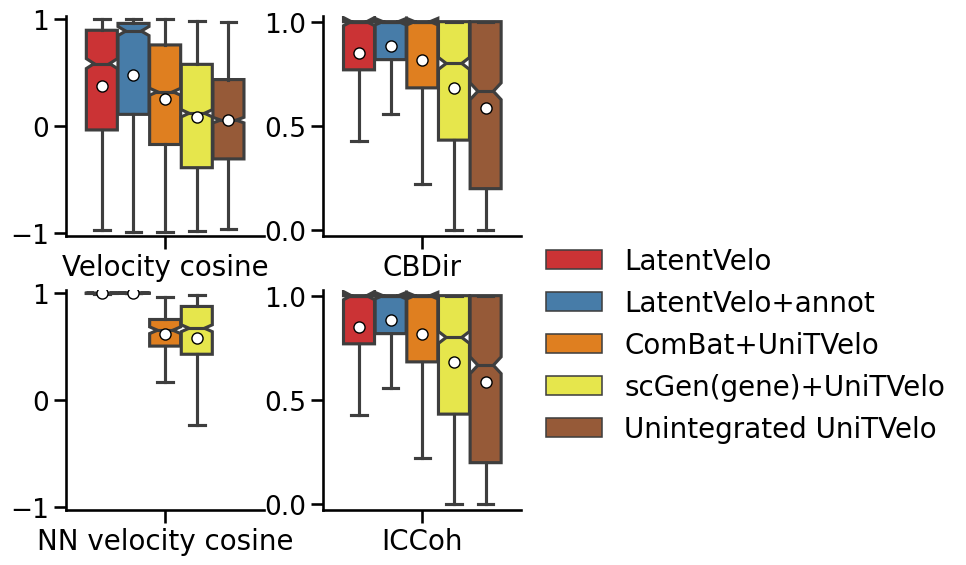

In [22]:
import seaborn as sns
ltv.pl.integration_velocity_metrics([model_velocity_df, model_annot_velocity_df, combat_velocity_df, 
                                     scgen_velocity_df, unint_velocity_df],
                                     ['LatentVelo', 'LatentVelo+annot',
                                     'ComBat+UniTVelo', 'scGen(gene)+UniTVelo',  'Unintegrated UniTVelo'],
                                     ['latent', 'latent', 'pca_20', 'pca_20', 'pca_20'], figsize=(10,6), 
                                     palette=np.array(sns.color_palette("Set1").as_hex())[[0,1, 4,5,6]],
                                    orient='v')
plt.savefig('../figures/integration_velocity_metrics_2knockout.pdf')
plt.show()

In [23]:
model_annot_adata.obs['sim_time'] = model_annot_adata.obs['sim_time'].values/model_annot_adata.obs['sim_time'].max()

computing velocities
    finished (0:00:00) --> added 
    'spliced_velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)


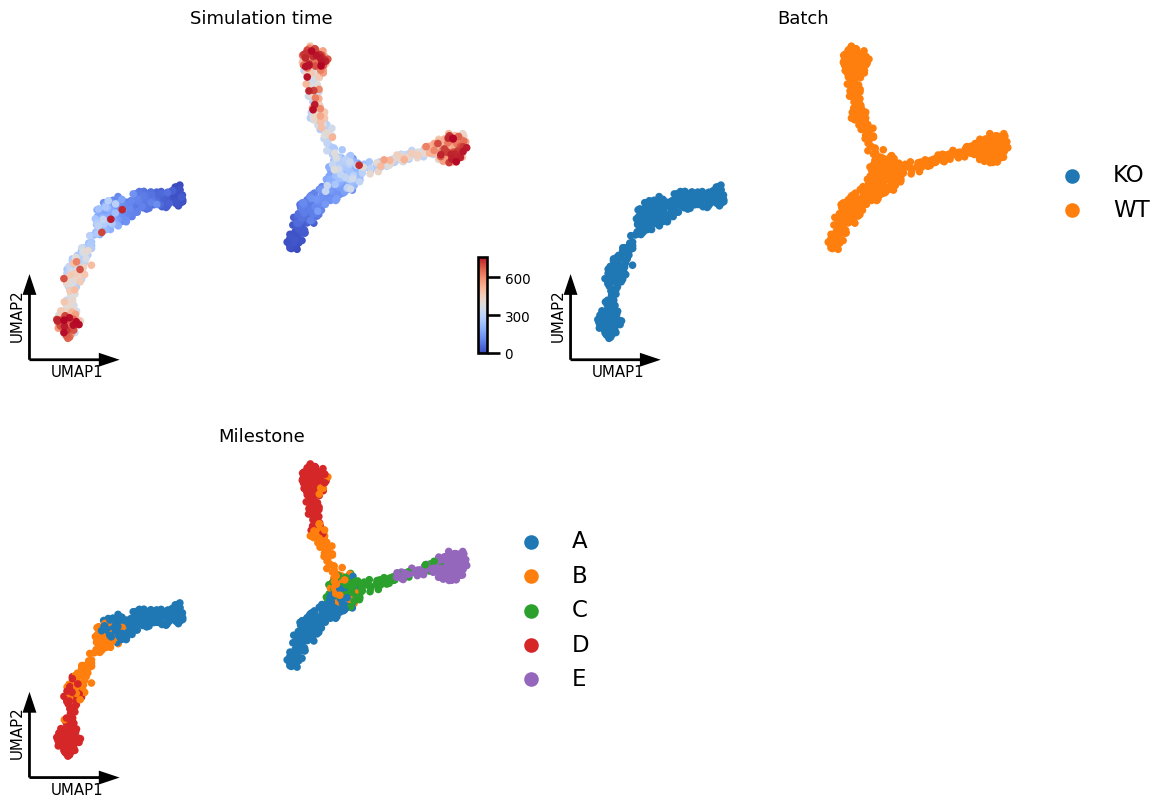

In [24]:
model_annot_adata_X = sc.read('batch_correction/fits/batch_correction_annot_2knockout_adata.h5ad')
#scv.pp.neighbors(model_annot_adata, use_rep='X', n_neighbors=30)
#sc.tl.umap(model_annot_adata, min_dist=1) #, random_state=2
scv.tl.velocity_graph(model_annot_adata_X, vkey='spliced_velocity')
scv.pl.umap(model_annot_adata_X, 
                                 color=['sim_time', 'model', 'milestone'],
                                title=['Simulation time', 'Batch', 'Milestone'], legend_loc='right', 
                                color_map='coolwarm',
                                frameon='artist', xlabel='UMAP1',ylabel='UMAP2', fontsize=13, ncols=2)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


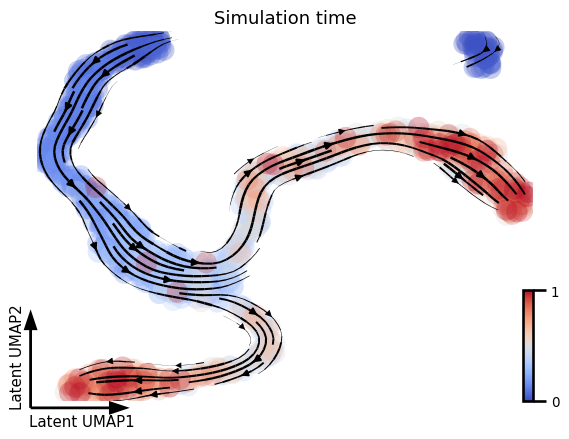

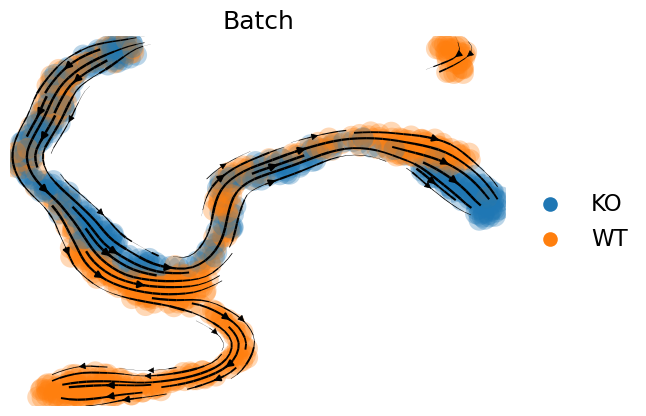

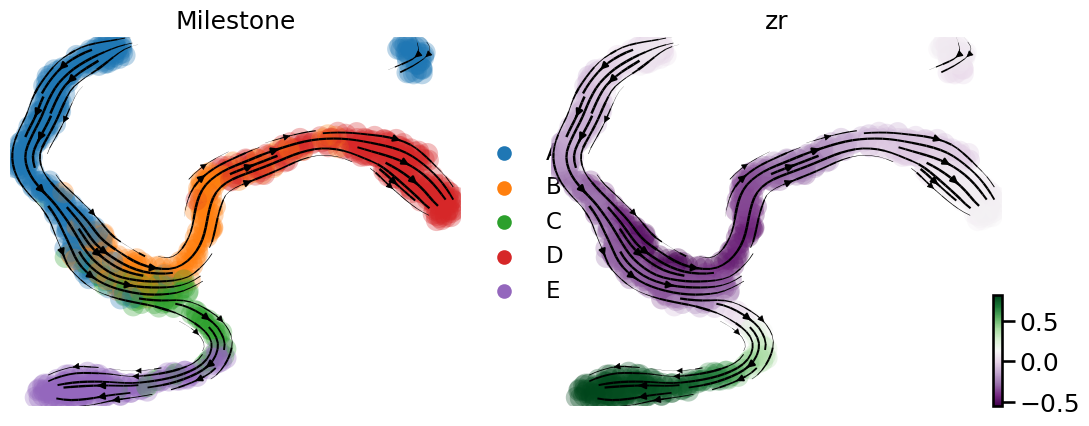

(None,)

In [25]:
scv.pp.neighbors(model_annot_adata, use_rep='X', n_neighbors=30)
sc.tl.umap(model_annot_adata, min_dist=1) #, random_state=2
scv.tl.velocity_graph(model_annot_adata, vkey='spliced_velocity')
scv.pl.velocity_embedding_stream(model_annot_adata, vkey='spliced_velocity', 
                                 color=['sim_time'],
                                 rescale_color=(0,1),
                                title=['Simulation time'], legend_loc='right', 
                                color_map='coolwarm',
                                frameon='artist', xlabel='Latent UMAP1',ylabel='Latent UMAP2', fontsize=13)#,
                                #save='figures/latent_umap_batch_correction_2knockout_part1.png')

scv.pl.velocity_embedding_stream(model_annot_adata, vkey='spliced_velocity', 
                                 color='model',
                                 rescale_color=(0,1),
                                title=['Batch'], legend_loc='right', 
                                color_map='coolwarm',
                                xlabel='Latent UMAP1',ylabel='Latent UMAP2'), 
                                #save='figures/latent_umap_batch_correction_2knockout_part2.png')

scv.pl.velocity_embedding_stream(model_annot_adata, vkey='spliced_velocity', 
                                 color=['milestone','zr'],
                                title=['Milestone', 'zr'], legend_loc='right', 
                                color_map='PRGn',
                                xlabel='Latent UMAP1',ylabel='Latent UMAP2'), 
                                #save='figures/latent_umap_batch_correction_2knockout_part3.png')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead.
saving figure to file ../figures/model_2bifurcation_velocity_zr.png


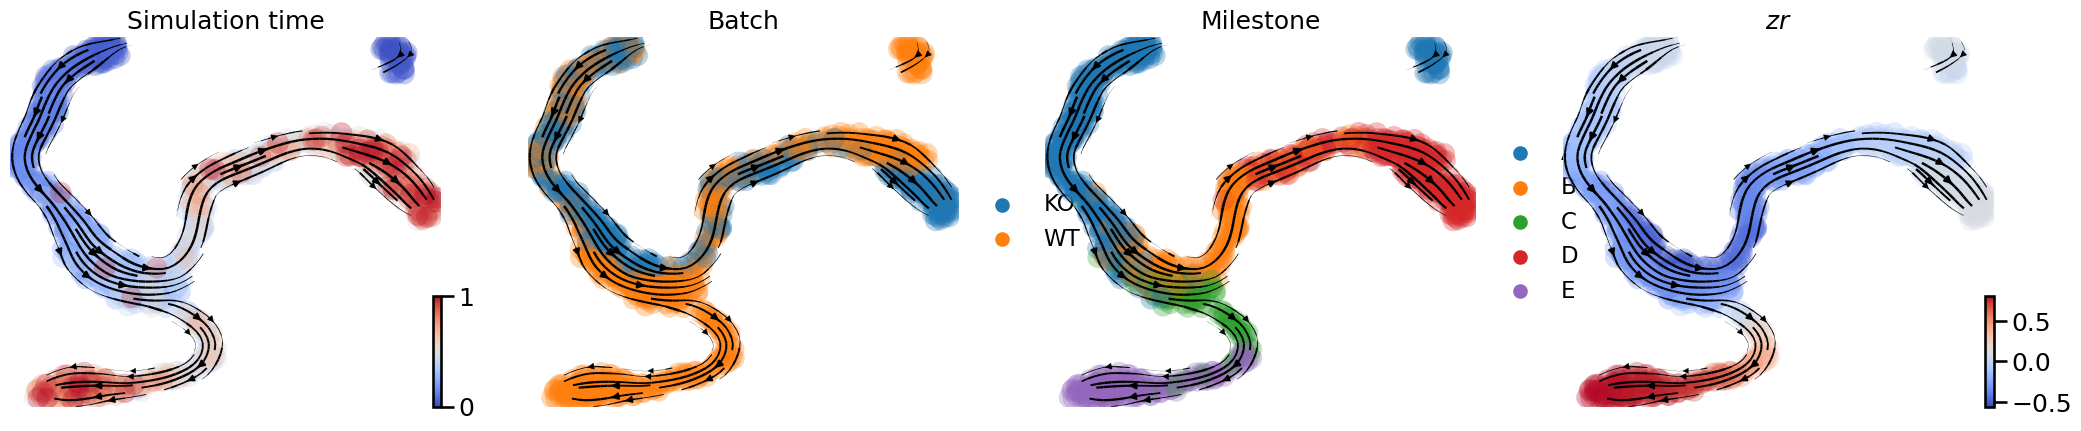

In [26]:
scv.pp.neighbors(model_annot_adata, use_rep='X', n_neighbors=30)
sc.tl.umap(model_annot_adata, min_dist=1)
scv.tl.velocity_graph(model_annot_adata, vkey='spliced_velocity')
scv.pl.velocity_embedding_stream(model_annot_adata, vkey='spliced_velocity', 
                                 color=['sim_time', 'batch', 'milestone', 'zr'],
                                title=['Simulation time', 'Batch', 'Milestone', r'$z_{r}$'], legend_loc='right', 
                                 save='../figures/model_2bifurcation_velocity_zr.pdf', color_map='coolwarm')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_model_2bifurcation_velocity1.png


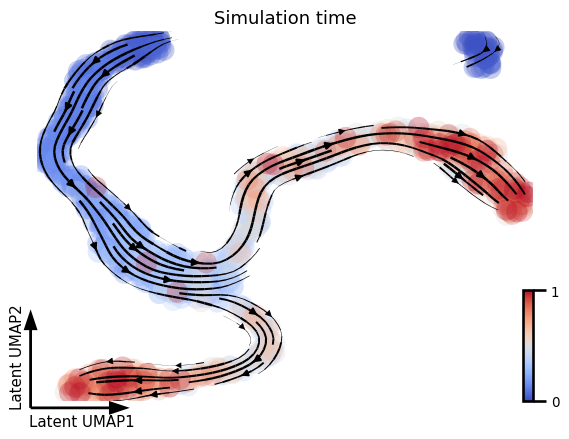

In [27]:
scv.pp.neighbors(model_annot_adata, use_rep='X', n_neighbors=30)
sc.tl.umap(model_annot_adata, min_dist=1)
scv.tl.velocity_graph(model_annot_adata, vkey='spliced_velocity')
scv.pl.velocity_embedding_stream(model_annot_adata, vkey='spliced_velocity', 
                                 color=['sim_time'],
                                title=['Simulation time'], legend_loc='right', 
                                 save='model_2bifurcation_velocity1.png', color_map='coolwarm',
                                frameon='artist', xlabel='Latent UMAP1',ylabel='Latent UMAP2', fontsize=13)

saving figure to file ./figures/scvelo_model_2bifurcation_velocity2.png


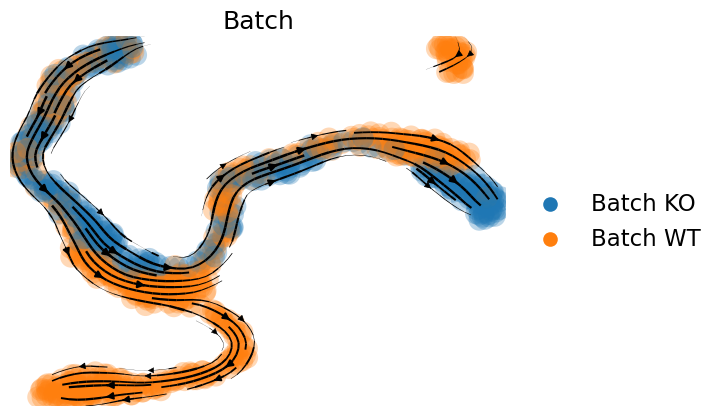

In [30]:
model_annot_adata.obs['batch_id'] = ['Batch '+i for i in model_annot_adata.obs['batch'].values]

scv.pl.velocity_embedding_stream(model_annot_adata, vkey='spliced_velocity', 
                                 color=['batch_id'],
                                title=['Batch'], legend_loc='right', 
                                 save='model_2bifurcation_velocity2.png', color_map='coolwarm')

In [ ]:
scv.pl.velocity_embedding_stream(model_annot_adata, vkey='spliced_velocity', 
                                 color=['milestone'],
                                title=['Milestone'], legend_loc='right', 
                                 save='model_2bifurcation_velocity3.png', color_map='coolwarm')

In [ ]:
scv.pl.velocity_embedding_stream(model_annot_adata, vkey='spliced_velocity', 
                                 color=['zt'],
                                title=[r'$z_{r}$'], legend_loc='right', 
                                 save='model_2bifurcation_velocity4.png', color_map='PRGn')